# **Heart disease prediction using DL**

Imports and data loading

In [166]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import seaborn as sns

data = pd.read_csv('data/heart_disease.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [167]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


Look for missing data. No missing data in the dataset.

In [168]:
print("Missing values in each column:\n", data.isnull().any())

Missing values in each column:
 age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool


Visualize the data

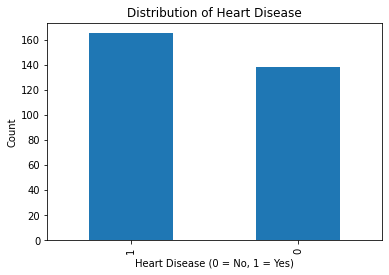

In [169]:
data['target'].value_counts().plot(kind='bar', title='Distribution of Heart Disease')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

Separate the features from the label and split the data 80/20

In [170]:
X = data.iloc[:,:13].values
y = data["target"].values

X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

Data normalization: I apply Z-Score normalization of the training set. The learned parameters (mean and standard deviation) are applied on the test data.

In [171]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Create the model and compile it. The model has three densely-connected layers, which end with sigmoid function (suited binary classification). For the optimization I use binary crossentropy cost function (suited for binary classification) and step length function for optimization. Dropout layer is added to make the model more robust. It added 4,5% of accuracy.

In [172]:
classifier = Sequential()
classifier.add(Dense(activation = "relu", input_dim = 13, units = 256, kernel_initializer = "uniform", kernel_regularizer=tf.keras.regularizers.l2(0.001)))
classifier.add(Dense(activation = "relu", units = 128, kernel_initializer = "uniform", kernel_regularizer=tf.keras.regularizers.l2(0.001)))
classifier.add(Dropout(0.5)) 
classifier.add(Dense(activation = "relu", units = 64, kernel_initializer = "uniform", kernel_regularizer=tf.keras.regularizers.l2(0.001)))
classifier.add(Dense(activation = "sigmoid", units = 1, kernel_initializer = "uniform"))

classifier.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=1e-5) , loss = 'binary_crossentropy', metrics = ['accuracy'] )

Summary of the model

In [173]:
classifier.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_62 (Dense)             (None, 256)               3584      
_________________________________________________________________
dense_63 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_18 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_64 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_65 (Dense)             (None, 1)                 65        
Total params: 44,801
Trainable params: 44,801
Non-trainable params: 0
_________________________________________________________________


Train the model and plot the results of the training

Epoch 1/100


25/25 [==============================] - 1s 16ms/step - loss: 0.7303 - accuracy: 0.4404 - val_loss: 0.7300 - val_accuracy: 0.3673
Epoch 2/100
25/25 [==============================] - 0s 6ms/step - loss: 0.7297 - accuracy: 0.5389 - val_loss: 0.7296 - val_accuracy: 0.3878
Epoch 3/100
25/25 [==============================] - 0s 6ms/step - loss: 0.7293 - accuracy: 0.5648 - val_loss: 0.7292 - val_accuracy: 0.4490
Epoch 4/100
25/25 [==============================] - 0s 7ms/step - loss: 0.7289 - accuracy: 0.5803 - val_loss: 0.7287 - val_accuracy: 0.4898
Epoch 5/100
25/25 [==============================] - 0s 7ms/step - loss: 0.7285 - accuracy: 0.5699 - val_loss: 0.7283 - val_accuracy: 0.4898
Epoch 6/100
25/25 [==============================] - 0s 8ms/step - loss: 0.7281 - accuracy: 0.5959 - val_loss: 0.7279 - val_accuracy: 0.4898
Epoch 7/100
25/25 [==============================] - 0s 7ms/step - loss: 0.7277 - accuracy: 0.6321 - val_loss: 0.7275 - val_accuracy: 0.5306
Epoch 8/100
25/25 [=====

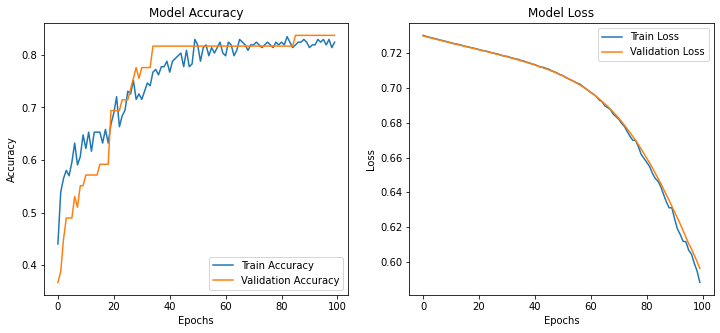

In [174]:
history = classifier.fit(X_train, y_train, batch_size = 8, epochs = 100, validation_split=0.2)

# Plot training & validation accuracy and loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Predict using the trained model

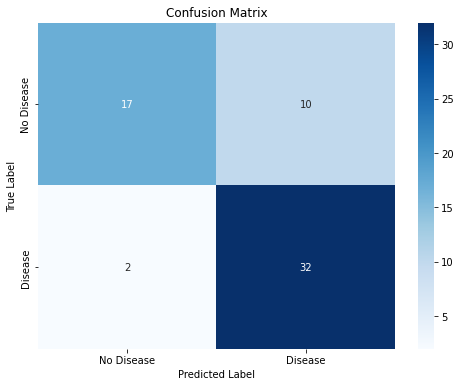

Accuracy: 80.33%
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.63      0.74        27
           1       0.76      0.94      0.84        34

    accuracy                           0.80        61
   macro avg       0.83      0.79      0.79        61
weighted avg       0.82      0.80      0.80        61



In [175]:
# Make prediction
y_pred = classifier.predict(X_test)

# The sigmoid function outputs values between 0 and 1, which is the probability of the prediction
# If higher than 0.5: true (has disease), else: false (no disease)
y_pred = (y_pred > 0.5)

cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

# Compute accuracy based on confusion matrix
accuracy = (cm[0][0] + cm[1][1]) / np.sum(cm)
print(f"Accuracy: {accuracy * 100:.2f}%")

print("Classification Report:")
print(classification_report(y_test, y_pred))

Summary:
* 89% of samples predicted as class 0 were correct
* 76% of samples predicted as class 1 were correct
* 63% of all actual class 0 samples are correcty identified.
* 94% of all actual class 1 samples are correcty identified.